In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import optimize
# Input data files are available in the read-only "../input/" directory
import matplotlib.pyplot as plt

import os


In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigder(x):
    return sigmoid(x) * (1-sigmoid(x))

In [3]:
            # we will be using a single layered neuran network for this implementation

def nnCost(nn_params,
           input_layer_size,
           hidden_layer_size,
           num_labels,
           X,y,lambda_=0):
#     with the formula we have fabricated we can get the two weights of the neural network which
#     we can write as theta1 and theta 2 which are concatenated in the nnparams
#     thetai = nnparams[len(thetai-1): hiddenlayeri * (hiddenlayer(i-1) + 1) + len(theta(i-1))]
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = y.size
         
    # we need to get the following parameters as the result of this function
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)


    
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    a3 = sigmoid(a2.dot(Theta2.T))
    
    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = Theta1
    temp2 = Theta2
    
    # Add regularization term
    
    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))
    
    J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term
    
    # Backpropogation
    
    delta_3 = a3 - y_matrix
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigder(a1.dot(Theta1.T))

    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)
    
    # Add regularization to gradient

    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]
    
    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])
    
    return J, grad
    

6

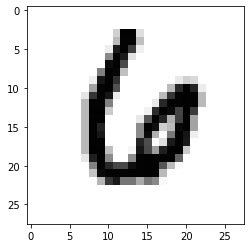

In [4]:
#lets define our input now 
trainfile = 'train.csv'
traindata = pd.read_csv(trainfile).to_numpy()

hidden_layer_size = 49
num_labels = 10
input_layer_size = traindata[:,1:].shape[1]
X,y = traindata[:,1:],traindata[:,0]
m = y.size
#lets show a random data from out traning set
rand = np.random.randint(0,m)
plt.imshow(255- X[rand].reshape(28,28) , cmap='gray')
y[rand]

In [5]:
#now we get the randomized weights for the neural network
def randweightgenerator(L_in,L_out,epsilon = 0.12):
    W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon - epsilon
    return W
theta1 = randweightgenerator(input_layer_size, hidden_layer_size)
theta2 = randweightgenerator(hidden_layer_size, num_labels)
#now we set nn_params as a list of theta 1 and theta 2 

nn_params = np.concatenate([theta1.ravel(), theta2.ravel()], axis=0)


In [6]:
#now we can use the optimizer from the scipy library to minimize our weights 
#  the other way to optimize this would be to use the gradients and do gradient descent
options = {'maxiter':1000}
lambda_ = 3

#now we make a temp cost function 
costfn = lambda p :nnCost(p,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)

res = optimize.minimize(costfn,nn_params,jac=True ,method="TNC",options=options)


/home/ashim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [7]:
finalnnparams = res.x


In [8]:
j,_ = nnCost(finalnnparams,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)
print('The final cost after traning is : ',j)

/home/ashim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


The final cost after traning is :  0.4786384139708637


In [9]:
# now lets define a fucntion which will use the given weights and predict the digits
def predict(nn_params,X,input_layer_size):
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))
    m = X.shape[0]
    
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    a3 = sigmoid(a2.dot(Theta2.T))
#     now lets get the index of maximum valued probability from p
    p = np.argmax(a3, axis = 1)
    return p

In [10]:
#load the testing data
testfile = 'test.csv'
testdata = pd.read_csv(testfile).to_numpy()
X_test = testdata
input_layer_size = testdata.shape[1]

outputs = predict(finalnnparams,X_test,input_layer_size)
finalres = outputs.tolist()

#submission part
df = pd.DataFrame(finalres)
df= df.rename(columns={0:'Label'})
df['ImageId'] = [i+1 for i in range(outputs.size)]
df.set_index('ImageId',inplace=True)
df.to_csv('submit.csv')

/home/ashim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0

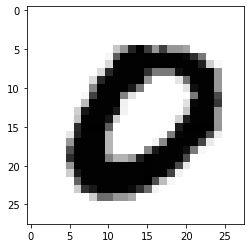

In [11]:
#now lets see some predictions
# visualization of the predictions
rand = np.random.randint(0,28000)
plt.imshow(255- X_test[rand].reshape(28,28) , cmap='gray')
outputs[rand]